In [1]:
# %matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
data = pd.concat([train,test])
data['LeadStatus'] = data['LeadStatus'].replace({"Passed":0, "Flagged":1, "Assign to CS":1})

In [3]:
first_visit = data[data['VisitDay'] == 0]
cols = list(first_visit.columns)
cluster_val = first_visit[cols[8:38]]
X = cluster_val.copy()

In [8]:
data['LeadStatus'].

0       0
1       0
2       0
3       0
4       1
5       0
6       0
7       1
8       1
9       1
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      0
28      0
29      0
       ..
4118    1
4119    1
4120    1
4121    1
4122    1
4123    0
4124    1
4125    1
4126    0
4127    0
4128    0
4129    1
4130    1
4131    1
4132    1
4133    1
4134    1
4135    1
4136    1
4137    1
4138    1
4139    1
4140    1
4141    1
4142    1
4143    1
4144    1
4145    1
4146    1
4147    1
Name: LeadStatus, Length: 20947, dtype: int64

In [5]:
scalers = {}
for col in cluster_val.columns:
    scaler = preprocessing.MinMaxScaler().fit(X[col].values.reshape(-1,1))
    scalers[col] = scaler
    X[col] = scaler.transform(X[col].values.reshape(-1,1))

In [6]:
X_ticks = cols[8:38]
X_org = cluster_val
X_colnames = cols[8:38]
y = first_visit['PANSS_Total']  # 'TOTAL PANSS'

# ss_X = preprocessing.StandardScaler()
# X = ss_X.fit_transform(X)

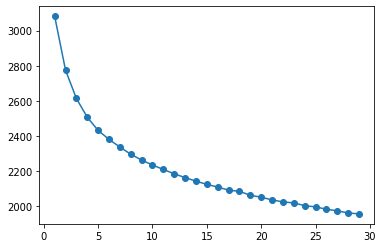

In [7]:
sse = []
for i in range(1,30):
    km = KMeans(n_clusters=i)
    km.fit(X)
    sse.append(km.inertia_)
    
plt.plot(list(range(1,30)), sse, '-o')
plt.savefig('plots/kmeans_elbow.png')

In [8]:
clust = KMeans(n_clusters=4, random_state=42)
X_cl = clust.fit_transform(X)
X_cl_labels = clust.labels_
cluster_val_y = X_cl_labels

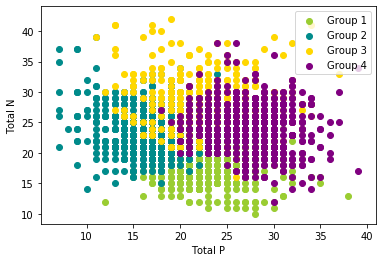

In [9]:
colors = ['yellowgreen','darkcyan','gold','purple']
for i in range(4):
    plt.scatter(np.sum(cluster_val.iloc[:,0:7].values,axis=1)[cluster_val_y == i], 
                np.sum(cluster_val.iloc[:,7:14].values,axis=1)[cluster_val_y == i], 
                label = 'Group {}'.format(i+1), 
                c = colors[i])
plt.legend()
plt.xlabel('Total P')
plt.ylabel('Total N')
plt.savefig('plots/KMeans_P_N.png')

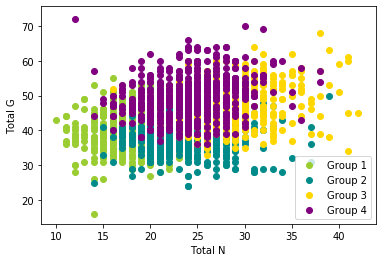

In [10]:
colors = ['yellowgreen','darkcyan','gold','purple']
for i in range(4):
    plt.scatter(np.sum(cluster_val.iloc[:,7:14].values,axis=1)[cluster_val_y == i], 
                np.sum(cluster_val.iloc[:,14:30].values,axis=1)[cluster_val_y == i], 
                label = 'Group {}'.format(i+1), 
                c = colors[i])
plt.legend()
plt.xlabel('Total N')
plt.ylabel('Total G')
plt.savefig('plots/KMeans_N_G.png')

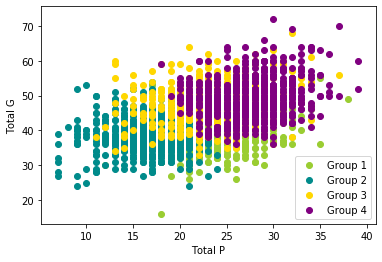

In [11]:
colors = ['yellowgreen','darkcyan','gold','purple']
for i in range(4):
    plt.scatter(np.sum(cluster_val.iloc[:,0:7].values,axis=1)[cluster_val_y == i], 
                np.sum(cluster_val.iloc[:,14:30].values,axis=1)[cluster_val_y == i], 
                label = 'Group {}'.format(i+1), 
                c = colors[i])
plt.legend()
plt.xlabel('Total P')
plt.ylabel('Total G')
plt.savefig('plots/KMeans_P_G.png')

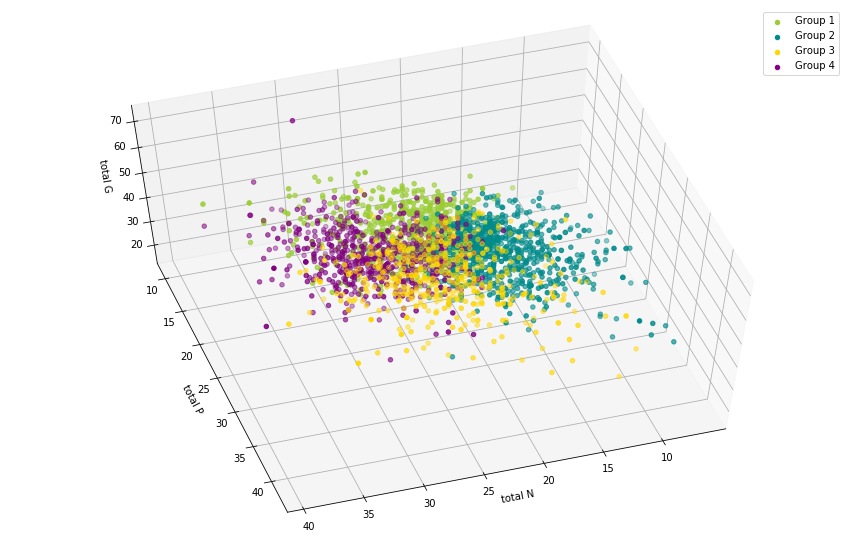

In [12]:
from mpl_toolkits.mplot3d import Axes3D


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
colors = ['yellowgreen','darkcyan','gold','purple']

for i in range(4):
    tN = np.sum(cluster_val.iloc[:,0:7].values,axis=1)[cluster_val_y == i]
    tP = np.sum(cluster_val.iloc[:,7:14].values,axis=1)[cluster_val_y == i]
    tG = np.sum(cluster_val.iloc[:,14:30].values,axis=1)[cluster_val_y == i]
    ax.scatter(tN, tP, tG, color = colors[i], label = 'Group {}'.format(i+1))

    
ax.set_xlabel('total N')
ax.set_ylabel('total P')
ax.set_zlabel('total G')
ax.view_init(elev=60, azim=72)
plt.legend(loc='best')
plt.show()
# plt.savefig('plots/KMeans_3d.pgf')

# for ii in range

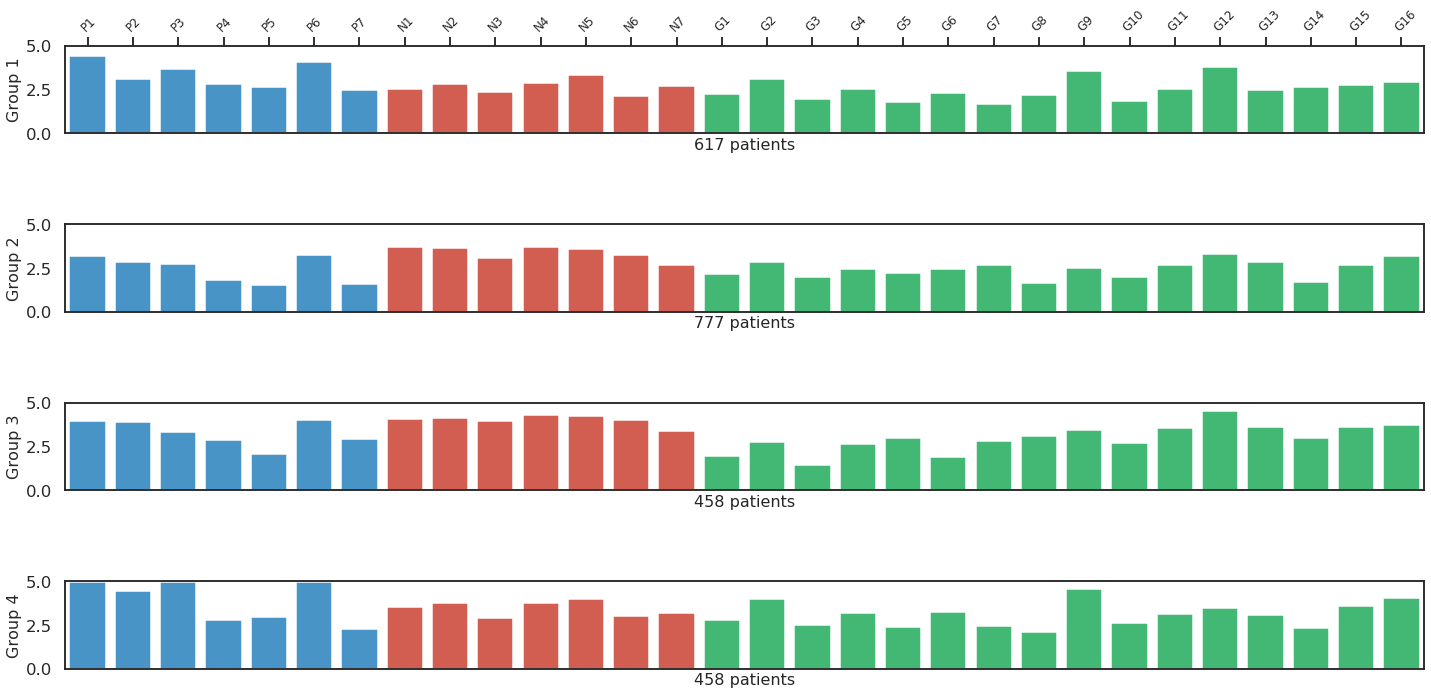

In [13]:
############
# plotting #
############

# centering x ticks
def rotateTickLabels(ax, rotation, which, rotation_mode='anchor', ha='left'):
    axes = []
    if which in ['x', 'both']:
        axes.append(ax.xaxis)
    elif which in ['y', 'both']:
        axes.append(ax.yaxis)
    for axis in axes:
        for t in axis.get_ticklabels():
            t.set_horizontalalignment(ha)
            t.set_rotation(rotation)
            t.set_rotation_mode(rotation_mode)


sns.set(style="white", context="talk")
# Set up the matplotlib figure
f, axarr = plt.subplots(4, 1, figsize=(20, 10), sharex=True)
# Generate some sequential data
my_palette = ['#3498db'] * 7 + ['#e74c3c'] * 7 + ['#2ecc71'] * 16
sns.set_palette(my_palette)
# X_ticks[12] = "Lack of spontaneity (N6)"

cl_mean = np.mean(X_org[X_cl_labels == 0], axis=0)
n_subs = np.sum(X_cl_labels == 0)
ax1 = sns.barplot(X_ticks, cl_mean, palette=my_palette, ax=axarr[0])
ax1.xaxis.set_ticks_position('top')
rotateTickLabels(ax1, 45, 'x')
ax1.xaxis.set_ticklabels(X_ticks, fontsize=12)
ax1.set_xlabel('%i patients' % n_subs, fontsize=16)
ax1.set_ylabel("Group 1", fontsize=16)

cl_mean = np.mean(X_org[X_cl_labels == 1], axis=0)
n_subs = np.sum(X_cl_labels == 1)
ax2 = sns.barplot(X_ticks, cl_mean, palette=my_palette, ax=axarr[1])
ax2.set_xlabel('%i patients' % n_subs, fontsize=16)
ax2.set_ylabel("Group 2", fontsize=16)

cl_mean = np.mean(X_org[X_cl_labels == 2], axis=0)
n_subs = np.sum(X_cl_labels == 2)
ax3 = sns.barplot(X_ticks, cl_mean, palette=my_palette, ax=axarr[2])
ax3.set_xlabel('%i patients' % n_subs, fontsize=16)
ax3.set_ylabel("Group 3", fontsize=16)

cl_mean = np.mean(X_org[X_cl_labels == 3], axis=0)
n_subs = np.sum(X_cl_labels == 2)
ax4 = sns.barplot(X_ticks, cl_mean, palette=my_palette, ax=axarr[3])
ax4.set_xlabel('%i patients' % n_subs, fontsize=16)
ax4.set_ylabel("Group 4", fontsize=16)

ax4.tick_params(axis='x',labelbottom=False)
# sns.despine(bottom=True)
plt.setp(f.axes, ylim=[0, 5.])
# plt.xticks(rotation= 90, fontsize=8)
plt.tight_layout(h_pad=4)
plt.savefig('plots/kmeans_4cl.png')
plt.show()